# Medios en Twitter: Muestras de infoxicación.
> Los medios nos estan infoxicando. 

- badges: false
- comments: true
- author: Victoregb
- categories: [opinión, análsis de datos, COVID]

Como españoles residiendo en Alemania hay una cosa que nos ha llamado la atención: Lo descuidados que son aqui con las medidas de prevención frente al coronavirus. Cierto es, que el país no se vio tan afectado como España. Ni tampoco por igual en todas partes, en Bavaria (región muy golpeada por la pandemia), se puede ver con asombro como la gente lleva mascarilla por la calle, mientras que en Hamburgo y alrededores la gente apenas las usa y en las zonas donde es obligatoria, como en los transportes públicos, su uso es relativamente laxo.  

Nosotros, que vivimos en una zona poco afectada y que hemos vivido el impacto que ha tenido en España a través de nuestras familias y amigos, seguimos tomando precauciones, como mantener una cierta distancia de seguridad. No nos engañemos, la gente nos mira raro.  

Sabemos que hay muchas causas que ayudan a explicar las diferencias en el número de contagios. Sin embargo, hay algo que nos ha llamado la atención y sí puede haber una relación entre el papel de los medios de comunicación durante la pandemia y la actitud de la gente.  

Sabemos que twiter no es una muestra representativa de la sociedad, pero eso no se aplica necesariamente a las cuentas de los medios de comunicación. He decidido analizar los twits de 8 medios de comunicación de ambos países, tanto liberales como conservadores, así como nacionales y regionales.  

Hemos recopilado los twits entre el 01/01/2020 hasta el 31/08/2020 de _El Pais_, _El mundo_, _La Vanguardia_ y _El Norte de Castilla_ como medios en castellano y en Alemán _Die Welt_, _Frankfurter Allgemeine Zeitung_, _Süddeutsche Zeitung_ y el _Thüringer Allgemeine_.  

Uno de los retos a tener en cuenta a la hora de analizar el contenido de los twits es que en el idioma alemán hay una gran cantidad de palabras compuestas lo cual puede falsear las gráficas de dispersión, por lo que hay que tenerlo en cuenta a la hora interpretarlas. 
Así que aqui tenemos el reto, 6 medios de comunicación, 171.107 twits y 1.777.522 palabras. Más o menos. 

Dicho esto, vamos a poner un poco de contexto. Los datos de contagios y fallecidos los he sacado de la pagina web _Our World in Data_ por lo que puede diferir un poco de los datos oficiales dados por las autonomías.  

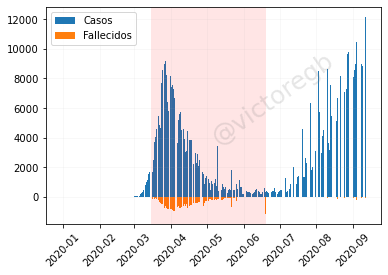

In [5]:
#collapse-hide
import pandas as pd
import matplotlib.pyplot as plt

lista_palabras = 'https://raw.githubusercontent.com/psiconomicon/blog/master/assets/lista_palabras.csv'
casos_decesos = 'https://raw.githubusercontent.com/psiconomicon/blog/master/assets/casos_decesos.csv'

df_palabras = pd.read_csv(lista_palabras)
df_palabras['date'] = pd.DatetimeIndex(df_palabras.date)
    
df_casos = pd.read_csv(casos_decesos)
df_casos['date'] = pd.DatetimeIndex(df_casos.date)

ini_confina = pd.to_datetime('2020-03-15 00:00:00')
fin_confina = pd.to_datetime('2020-06-20 00:00:00')

fig, ax1 = plt.subplots()
ax1.bar(df_casos.date, df_casos.new_cases_ESP);
ax1.bar(df_casos.date, df_casos.new_deaths_ESP);
ax1.legend(['Casos', 'Fallecidos'], loc='best');
ax1.grid(alpha=0.1)
plt.xticks(rotation=45);
plt.axvspan(ini_confina, fin_confina, facecolor='red', alpha=0.1)
fig.text(0.50, 0.4, '@victoregb', fontsize=25, color='gray',rotation=35, alpha=0.2);

Este grafico muestra los nuevos casos registrados diariamente y la sección en fondo rojo el confinamiento en España. Como podemos la  observar da la sensación de que la segunda ola es ahora tan grande como la primera.  Pero como mostraron datadista esto es un error. Vamos a hacer nuestra propia versión. Gracias al estudio de Seroprevalencia, ahora sabemos que durante la primera ola, sólo detectábamos un contagiado de cada 10. Por suerte, las técnicas han mejorado y estimamos que ahora detectamos a 7 de cada 10. Y eso en que se traduce:
Exacto, la nueva estimación es que ahora no estamos ni de lejos tan mal como durante la primera ola. Y si tomamos lo que indicaba Tomas Pueyo, el confinamiento fue el martillo para doblar la curva, y ahora estamos viviendo la danza.

In [10]:
#collapse-hide

confin_est = alt.Chart(confina_est_df).mark_rect(color='firebrick', opacity=0.1).encode(
    x='x_min:T',
    x2='x_max:T',
    y='y_min:Q',
    y2='y_max:Q')

casos_est = base1.mark_bar(opacity=0.1).encode(x=alt.X('date:T', title='Fecha'), 
                                           y=alt.Y('new_cases_est_ESP:Q', title="Casos"))
decesos = base1.mark_bar(color='orange',opacity=0.1).encode(x=alt.X('date:T', title='Fecha'), 
                                           y=alt.Y('new_deaths_ESP:Q'))


alt.layer(confin_est + casos_est + decesos).interactive()

alt.LayerChart(...)

Es normal que los casos suban y bajen. Hay tener en cuenta que aunque los datos pareca que se repitan de nuevo, no es la misma historia. 
¿Y lo medios de comunicación entonces? Vamos a comparar el grafico de casos estimados con las noticias. La situación ha mejorado, pero sigue habiendo una gran cantidad de noticias sobre casos y el virus. Entiendo que sea un tema de actualidad, pero la omnipresencia en los medios afecta a nuestra percepción de la realidad. 

In [11]:
#collapse-hide
medios_ESP = ['El Pais', 'El Mundo', 'La Vanguardia', 'El Norte de Castilla']
medio_ALE =['Die Welt','Frankfurter Allgemeine Zeitung', 'Thüringer Allgemeine', 'Süddeutsche Zeitung']


base2 = alt.Chart(df_palabras)

chart = alt.vconcat()
for i in medios_ESP:
    chart |= base2.mark_tick(opacity=0.1).encode(x=alt.X('date:T', title='Fecha'), 
                                                   y=alt.Y('texto:N', title="Palabras en "+i),
                                                   color=(alt.Color('texto:N', legend=None))).transform_filter(datum.medio == i)

In [12]:
#hide
alt.layer(confin_est + casos_est + decesos)

alt.LayerChart(...)

In [13]:
#hide
chart

alt.HConcatChart(...)

¿Y los alemanes?  
Ellos no han tenido un confinamiento tan estricto como en españa, debido al rechazo que la idea generaba en aquellos que aun recuerdan el muro que separó a las dos alemanias y de la preocupación del aumento de la violencia de genero y los abusos infantiles. Por esta razón no añadiremos un indicador de confinamiento a su grafia. Tampoco he localizado estimaciones de casos reales por lo que pondremos un grafica de los datos que han dado. 
Tras retocar un poco la base de datos para que palabras compuestas cuenten como sus sinónimos simples, como por ejemplo, _neuinfektionen_ (nuevos infectados) por _infektionen_ (infectados). _Corona_ es otro ejemplo maravilloso, porque tiene _Coronavirus_,  _Coronakrise_ o _Coronapandemie_, pero bueno, nos quedamos con un par de clasicos universales: _Corona_ y _Coronavirus_.


In [14]:
#hide-colaps
casos2 = base1.mark_bar(opacity=0.1).encode(x=alt.X('date:T', title='Fecha'), 
                                           y=alt.Y('new_cases_ALE:Q', title="Casos"))
decesos2 = base1.mark_bar(color='orange',opacity=0.1).encode(x=alt.X('date:T', title='Fecha'), 
                                           y=alt.Y('new_deaths_ALE:Q'))


plot2 = alt.vconcat()
for i in medio_ALE:
    plot2 |= base2.mark_tick(opacity=0.1).encode(x=alt.X('date:T', title='Fecha'), 
                                                   y=alt.Y('texto:N', title="Palabras en "+i),
                                                   color=(alt.Color('texto:N', legend=None))).transform_filter(datum.medio == i)

In [15]:
#hide
alt.layer(casos2 + decesos2)

alt.LayerChart(...)

In [16]:
#hide
plot2

alt.HConcatChart(...)

Se nota la diferencia, ¿verdad? Apenas hacen mención de fallecidos (_todesfälle_). El resto de palabras no necesitan traducción. Como en españa, la COVID es el tema de moda. Pero ni por asomo dan tanta publicidad a los infectados y los fallecidos como en España.   El lector avezado dirá que igual los diagramas de dispersión son más diáfanos porque los medios alemanes tuitean menos, y así es. Sin embargo, jamás diríamos que los alemanes son ajenos a la realidad que les rodea o que estan peor informados que nosotros.
Estas situaciones de crisis uno de nuestros peores enemigos es la incertidumbre, pues hace que sea más difícil la toma de decisiones. Es por ello que dependemos de los medios de comunicación para infromarnos. Ahora bien, con la digitalización de la prensa la relación medios consumidor ha cambiado y eso también hay que tenerlo en cuenta.  

Todo esto no quiere decir que nos tengamos que relajar o que no haya nada por lo que preocuparse, sino que todo debe hacerse en su justa medida y para ello necesitamos estar bien informados y cuando la incertidumbre impera, ser cautos, actuar con cabeza y no dejarse polarizar.   
¡Mucho animo a tod@s!  